# projet de abdellah aghlalou :

In [0]:
from bs4 import BeautifulSoup as bfs 
from urllib.request import urlopen , Request
import pandas as pd
import numpy as np

# web scraping ( avito ) :


avito.com is a e-commerce site that contains millions of products of differents products.

In [0]:
headers='name,time,price,city,category\n'
f=open('products.csv','w', encoding='utf-8')
f.write(headers)
for i in tqdm.trange(1,3004):
        req=Request("https://www.avito.ma/fr/maroc/?o="+str(i), headers={'User-Agent':''})
        A=urlopen(req)
        pagehtml=A.read()
        A.close()
        page_soup=bfs(pagehtml,"html.parser")
        contents=page_soup.findAll("div",{'class':['item', 'li-hover', 'bump']})
        for i in range(len(contents)) :
            # scraper le temps d'annonce
            temps=page_soup.findAll("abbr",{"class" : 'text-center'})
            time=temps[i].text 
            if "Aujourd'hui" in time :
                time=time.replace("Aujourd'hui","03Apl")
            if 'Hier' in time :
                time=time.replace("Hier","02Apl")
            # scraper le prix d'annonce
            prices=page_soup.findAll("div",{"class" : "item-price"})
            prix=prices[i].span.text.replace(' ','').replace('DH','')
            # scraper la ville
            city=((contents[i].span.text).split(',')[1]).split('-')[0].replace('\n','')
            # scraper la categorie
            category=(contents[i].span.text.replace('\n','')).split(',')[0].split('-')
            if len(category)==2:
                category=category[1]
            else :
                category=category[0]
            # scraper le nom
            name=contents[i].h2.a.text.replace('\n','')
            f.write(name+','+time.replace('\n','').replace(' ','')+','+prix.replace('\n','')+','+city.replace(' ','')+','+category+'\n')
f.close()            

In [0]:
contents

# chargement des donnes :

In [0]:
df=pd.read_csv('products.csv')

# infos sur les donnes :

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105140 entries, 0 to 105139
Data columns (total 5 columns):
name        105140 non-null object
time        105140 non-null object
price       75226 non-null float64
city        105140 non-null object
category    105140 non-null object
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


In [0]:
df.head()

,name,time,price,city,category
0,suzuki celerio -2012,03Apl12:14,57000.0,Casablanca,Voitures
1,شقة للرهن,03Apl12:13,30000.0,Marrakech,Appartements
2,جهاز تصفية مياه الشرب المنزلي,03Apl12:13,NaN,Fès,Electroménager et Vaisselles
3,Tv nikai led hd 24p récepteur intégré,03Apl12:13,1200.0,Casablanca,Télévisions
4,Maserati Ghibli diesel -2016,03Apl12:13,NaN,Casablanca,Voitures


In [0]:
df.describe()

,price
count,7.522600e+04
mean,2.726806e+05
std,1.096466e+07
min,1.000000e+00
25%,7.000000e+02
50%,2.400000e+03
75%,1.340000e+04
max,1.800000e+09


# statistiques et visualisation


In [0]:
import seaborn 
import matplotlib.pyplot as plt 
%matplotlib inline

-1- l'annonce la plus cher :

In [0]:
df[df['price']==df.max()['price']]

,name,time,price,city,category
86411,مزرعة 225 هكتار,14Mar02:06,1.800000e+09,Meknès,Terrains et Fermes


-2-nombre d'annonce par ville et la ville qui le plus grand nombre d'annonce:

In [0]:
a=df.groupby('city').count().sort_values(by='category',ascending=False).head()
a.reset_index(inplace=True)
a

,city,name,time,price,category
0,Casablanca,32386,32386,20979,32386
1,Rabat,12440,12440,9227,12440
2,Marrakech,9423,9423,7097,9423
3,Tanger,6922,6922,5557,6922
4,Agadir,6242,6242,4516,6242


Text(0.5, 1, 'annonces par villes')

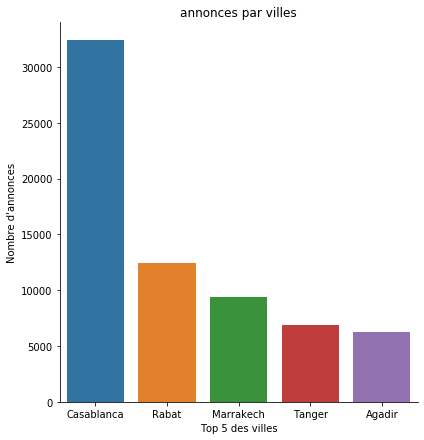

In [0]:
g = seaborn.catplot(x="city", y="category", data=a,height=6, kind="bar")
g.set_xlabels("Top 5 des villes")
g.set_ylabels("Nombre d'annonces")
plt.title("annonces par villes")

-3-nombre d'annonce par category

In [0]:
df.groupby('category').count()

,name,time,price,city
category,,,,
Appartements,26,26,22,26
Bureaux et Plateaux,3,3,2,3
Camions,5,5,4,5
Colocations,1,1,1,1
Engins BTP,2,2,1,2
Locations de vacances,12,12,12,12
Magasins,1,1,1,1
Maisons et Villas,4,4,4,4
Terrains et Fermes,7,7,5,7


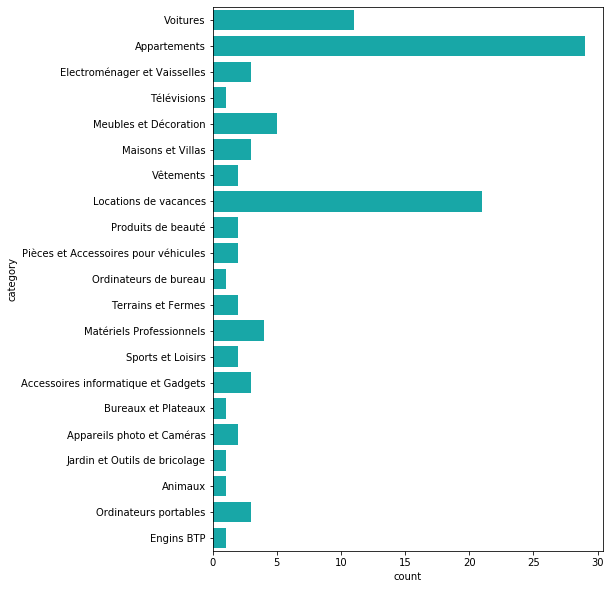

In [0]:
f, ax = plt.subplots(figsize=(7, 10))
seaborn.countplot(y="category", data=df.head(100), color="c")

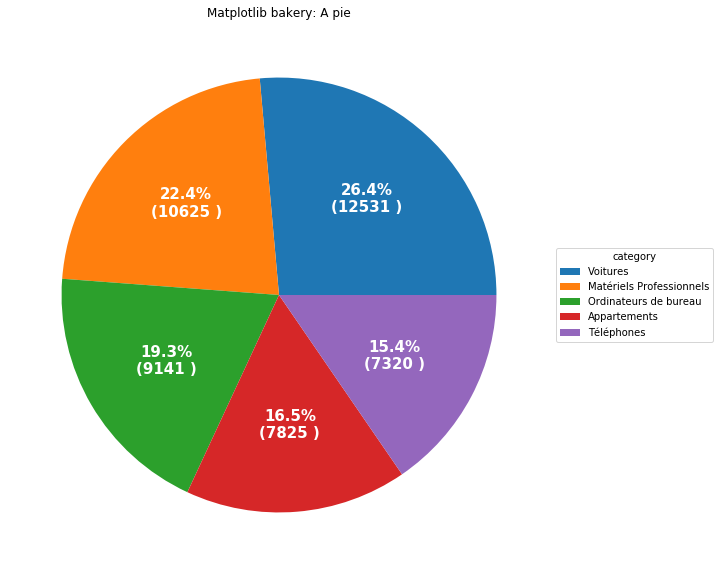

In [0]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(list(b['name']), autopct=lambda pct: func(pct, list(b['name'])),
                                  textprops=dict(color="w"))

ax.legend(wedges, list(b['category']),
          title="category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Matplotlib bakery: A pie")
plt.show()

In [0]:
df.head()

,name,time,price,city,category
0,maison 105 m2 commercial M 'hamid,31 Mar12:39,1500000.0,Marrakech,Maisons et Villas
1,Tout les marque pneu a partir,31 Mar12:38,450.0,Casablanca,Pièces et Accessoires pour véhicules
2,Appartement en Vente à Mohammedia,31 Mar12:38,580000.0,Mohammedia,Appartements
3,Audi SQ8 tdi Quattro S-line diesel -2020,31 Mar12:38,NaN,Casablanca,Voitures
4,Toyota Prado VX diesel -2008,31 Mar12:38,NaN,Marrakech,Voitures


-3- Annonces sans prix :

In [0]:
df[df['price'].isnull()].count()

name        29004
time        29004
price           0
city        29004
category    29004
dtype: int64

In [0]:
df[np.isfinite(df['price'])]

,name,time,price,city,category
0,suzuki celerio -2012,03Apl12:14,57000.0,Casablanca,Voitures
1,شقة للرهن,03Apl12:13,30000.0,Marrakech,Appartements
3,Tv nikai led hd 24p récepteur intégré,03Apl12:13,1200.0,Casablanca,Télévisions
5,W Table et chaise coiffeur,03Apl12:13,600.0,Rabat,Meubles et Décoration
6,فيلا رائعة مفروشة ما بين ملعب الكرة,03Apl12:13,3300000.0,Tanger,Maisons et Villas
...,...,...,...,...,...
105134,غرفة نوم خشب,11Mar17:45,9000.0,Marrakech,Meubles et Décoration
105135,valise,11Mar17:45,400.0,Rabat,Sacs et Accessoires
105136,HP Pavilion HP 14 i5 8ème NVIDIA GeForce,11Mar17:45,6800.0,Fès,Ordinateurs portables
105137,bmw e60 520i serie 5 -2004,11Mar17:44,62000.0,Tanger,Voitures


-5-annonce plus cher par category :

In [0]:
ancpluscher=df[['price','category']].groupby('category').max()
ancpluscher

,price
category,
Appartements,2.200000e+06
Autre Immobilier,NaN
Bureaux et Plateaux,4.500000e+03
Camions,1.080000e+05
Colocations,1.200000e+03
Engins Agricole,3.070000e+05
Engins BTP,2.100000e+05
Locations de vacances,6.000000e+02
Magasins,1.100000e+04
